# Simulator CartPole

In [45]:
import numpy as np
from scipy.integrate import odeint
from components.systems.inverted_pendulum_system import InvertedPendulumSystem
from components.controllers.pid_controller import PIDController

import matplotlib.pyplot as plt

In [277]:
def plot_cartPole(hist: dict, 
                  hist0: dict,
                  hist1: dict,
                  hist2: dict,
                  level_sp: float,
                  level_sp1: float,
                  level_sp2: float,
                  goal_treshold: dict, 
                  fig_save_name=None):
    
    cfg_figsize = (10, 5)
    cfg_title_size = 20
    cfg_axis_label_size = 18
    cfg_axis_tick_size = 14
    cfg_title_pad = 10
    cfg_axis_label_pad = 6
    cfg_legend_size = 'medium'
    ####################################################
    time_raw0              = np.array(hist0['time'])
    cart_position_raw0     = np.array(hist0['cart_position'])
    cart_velocity_raw0     = np.array(hist0['cart_velocity'])
    pendulum_angle_raw0    = np.array(hist0['pendulum_angle'])
    pendulum_vel_raw0      = np.array(hist0['pendulum_vel'])
    control_raw0           = np.array(hist0['control'])

    time0              = time_raw0[~np.isnan(time_raw0)]
    cart_position0     = cart_position_raw0[~np.isnan(cart_position_raw0)]
    cart_velocity0     = cart_velocity_raw0[~np.isnan(cart_velocity_raw0)]
    pendulum_angle0    = pendulum_angle_raw0[~np.isnan(pendulum_angle_raw0)]
    pendulum_vel0      = pendulum_vel_raw0[~np.isnan(pendulum_vel_raw0)]
    control0           = control_raw0[~np.isnan(control_raw0)]

    t_adjust0 = len(time0)
    ####################################################
    time_raw              = np.array(hist['time'])
    cart_position_raw     = np.array(hist['cart_position'])
    cart_velocity_raw     = np.array(hist['cart_velocity'])
    pendulum_angle_raw    = np.array(hist['pendulum_angle'])
    pendulum_vel_raw      = np.array(hist['pendulum_vel'])
    control_raw           = np.array(hist['control'])

    time              = time_raw[~np.isnan(time_raw)]
    cart_position     = cart_position_raw[~np.isnan(cart_position_raw)]
    cart_velocity     = cart_velocity_raw[~np.isnan(cart_velocity_raw)]
    pendulum_angle    = pendulum_angle_raw[~np.isnan(pendulum_angle_raw)]
    pendulum_vel      = pendulum_vel_raw[~np.isnan(pendulum_vel_raw)]
    control           = control_raw[~np.isnan(control_raw)]
    
    t_adjust = len(time)
    ####################################################
    time_raw1              = np.array(hist1['time'])
    cart_position_raw1     = np.array(hist1['cart_position'])
    cart_velocity_raw1     = np.array(hist1['cart_velocity'])
    pendulum_angle_raw1    = np.array(hist1['pendulum_angle'])
    pendulum_vel_raw1      = np.array(hist1['pendulum_vel'])
    control_raw1           = np.array(hist1['control'])

    time1              = time_raw1[~np.isnan(time_raw1)]
    cart_position1     = cart_position_raw1[~np.isnan(cart_position_raw1)]
    cart_velocity1     = cart_velocity_raw1[~np.isnan(cart_velocity_raw1)]
    pendulum_angle1    = pendulum_angle_raw1[~np.isnan(pendulum_angle_raw1)]
    pendulum_vel1      = pendulum_vel_raw1[~np.isnan(pendulum_vel_raw1)]
    control1           = control_raw1[~np.isnan(control_raw1)]
    
    t_adjust1 = len(time1)
    ####################################################
    time_raw2              = np.array(hist2['time'])
    cart_position_raw2     = np.array(hist2['cart_position'])
    cart_velocity_raw2     = np.array(hist2['cart_velocity'])
    pendulum_angle_raw2    = np.array(hist2['pendulum_angle'])
    pendulum_vel_raw2      = np.array(hist2['pendulum_vel'])
    control_raw2           = np.array(hist2['control'])

    time2              = time_raw2[~np.isnan(time_raw2)]
    cart_position2     = cart_position_raw2[~np.isnan(cart_position_raw2)]
    cart_velocity2     = cart_velocity_raw2[~np.isnan(cart_velocity_raw2)]
    pendulum_angle2    = pendulum_angle_raw2[~np.isnan(pendulum_angle_raw2)]
    pendulum_vel2      = pendulum_vel_raw2[~np.isnan(pendulum_vel_raw2)]
    control2           = control_raw2[~np.isnan(control_raw2)]
    
    t_adjust2 = len(time2)
    ####################################################
    # Logic Plot
    # Fig 1: Pendulum angle vs Time
    fig1, ax1 = plt.subplots(1, 1, figsize=cfg_figsize)
    ax1.plot(time[:t_adjust], pendulum_angle[:t_adjust], label='Final PID | sp=0.0', color='b')
    ax1.axhline(y=level_sp+goal_treshold['angle_threshold'], color='b', linestyle='--', alpha=0.5)
    ax1.axhline(y=level_sp-goal_treshold['angle_threshold'], color='b', linestyle='--', label='Goal threshold | sp=0.0', alpha=0.5)
    ax1.plot(time1[:t_adjust1], pendulum_angle1[:t_adjust1], label='Final PID | sp=0.5', color='g')
    ax1.axhline(y=level_sp1+goal_treshold['angle_threshold'], color='g', linestyle='--', alpha=0.5)
    ax1.axhline(y=level_sp1-goal_treshold['angle_threshold'], color='g', linestyle='--', label='Goal threshold | sp=0.5', alpha=0.5)
    ax1.plot(time2[:t_adjust2], pendulum_angle2[:t_adjust2], label='Final PID | sp=-0.5', color='tab:orange')
    ax1.axhline(y=level_sp2+goal_treshold['angle_threshold'], color='tab:orange', linestyle='--', alpha=0.5)
    ax1.axhline(y=level_sp2-goal_treshold['angle_threshold'], color='tab:orange', linestyle='--', label='Goal threshold | sp=-0.5', alpha=0.5)
    ax1.plot(time0[:t_adjust0], pendulum_angle0[:t_adjust0], label='Initial PID', color='r', alpha=1.0)
    ax1.set_xlabel('Time [s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    ax1.set_ylabel('Pendulum angle [rad]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    plt.setp(ax1.get_xticklabels(), fontsize=cfg_axis_tick_size)
    plt.setp(ax1.get_yticklabels(), fontsize=cfg_axis_tick_size)
    ax1.set_title('Pendulum angle vs Time', fontsize=cfg_title_size, pad=cfg_title_pad)
    ax1.grid(True)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fontsize=cfg_legend_size, numpoints=1, ncol=4)
    plt.tight_layout()
    if fig_save_name is not None:
        fig1.savefig(f"{fig_save_name}_angle.png", bbox_inches='tight')
    
    # Fig 2: Pendulum velocity vs Time
    fig2, ax2 = plt.subplots(1, 1, figsize=cfg_figsize)
    ax2.plot(time[:t_adjust], pendulum_vel[:t_adjust], label='Final PID | sp=0.0', color='b')
    ax2.plot(time1[:t_adjust1], pendulum_vel1[:t_adjust1], label='Final PID | sp=0.5', color='g')
    ax2.plot(time2[:t_adjust2], pendulum_vel2[:t_adjust2], label='Final PID | sp=-0.5', color='tab:orange')
    ax2.axhline(xmax=5, y=level_sp+goal_treshold['angle_vel_threshold'], color='k', linestyle='--', alpha=0.5)
    ax2.axhline(xmax=5, y=level_sp-goal_treshold['angle_vel_threshold'], color='k', linestyle='--', label='Goal threshold | sp=0.0,0.5,-0.5', alpha=0.5)
    ax2.plot(time0[:t_adjust0], pendulum_vel0[:t_adjust0], label='Initial PID', color='r', alpha=1.0)
    ax2.set_xlabel('Time [s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    ax2.set_ylabel('Pendulum velocity [rad/s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    plt.setp(ax2.get_xticklabels(), fontsize=cfg_axis_tick_size)
    plt.setp(ax2.get_yticklabels(), fontsize=cfg_axis_tick_size)
    ax2.set_title('Pendulum velocity vs Time', fontsize=cfg_title_size, pad=cfg_title_pad)
    ax2.grid(True)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fontsize=cfg_legend_size, numpoints=1, ncol=3)
    plt.tight_layout()
    if fig_save_name is not None:
        fig2.savefig(f"{fig_save_name}_angle_vel.png", bbox_inches='tight')
    
    # Fig 3: Cart position vs Time
    fig3, ax3 = plt.subplots(1, 1, figsize=cfg_figsize)
    ax3.plot(time0[:t_adjust0], cart_position0[:t_adjust0], label='Initial PID', color='r', alpha=1.0)
    ax3.plot(time[:t_adjust], cart_position[:t_adjust], label='Final PID | sp=0.0', color='b')
    ax3.plot(time1[:t_adjust1], cart_position1[:t_adjust1], label='Final PID | sp=0.5', color='g')
    ax3.plot(time2[:t_adjust2], cart_position2[:t_adjust2], label='Final PID | sp=-0.5', color='tab:orange')
    ax3.set_xlabel('Time [s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    ax3.set_ylabel('Cart position [m]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    plt.setp(ax3.get_xticklabels(), fontsize=cfg_axis_tick_size)
    plt.setp(ax3.get_yticklabels(), fontsize=cfg_axis_tick_size)
    ax3.set_title('Cart position vs Time', fontsize=cfg_title_size, pad=cfg_title_pad)
    ax3.grid(True)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fontsize=cfg_legend_size, numpoints=1, ncol=2)
    plt.tight_layout()
    if fig_save_name is not None:
        fig3.savefig(f"{fig_save_name}_cart_pos.png", bbox_inches='tight')
    
    # Fig 4: Cart velocity vs Time
    fig4, ax4 = plt.subplots(1, 1, figsize=cfg_figsize)
    ax4.plot(time0[:t_adjust0], cart_velocity0[:t_adjust0], label='Initial PID', color='r', alpha=1.0)
    ax4.plot(time[:t_adjust], cart_velocity[:t_adjust], label='Final PID | sp=0.0', color='b')
    ax4.plot(time1[:t_adjust1], cart_velocity1[:t_adjust2], label='Final PID | sp=0.5', color='g')
    ax4.plot(time2[:t_adjust2], cart_velocity2[:t_adjust2], label='Final PID | sp=-0.5', color='tab:orange')
    ax4.set_xlabel('Time [s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    ax4.set_ylabel('Cart velocity [m/s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    plt.setp(ax4.get_xticklabels(), fontsize=cfg_axis_tick_size)
    plt.setp(ax4.get_yticklabels(), fontsize=cfg_axis_tick_size)
    ax4.set_title('Cart velocity vs Time', fontsize=cfg_title_size, pad=cfg_title_pad)
    ax4.grid(True)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fontsize=cfg_legend_size, numpoints=1, ncol=2)
    plt.tight_layout()
    if fig_save_name is not None:
        fig4.savefig(f"{fig_save_name}_cart_vel.png", bbox_inches='tight')
    
    # Fig 5: Control action vs Time
    fig5, ax5 = plt.subplots(1, 1, figsize=cfg_figsize)
    ax5.plot(time0[:t_adjust0], control0[:t_adjust0], label='Initial PID', color='r', alpha=1.0)
    ax5.plot(time[:t_adjust], control[:t_adjust], label='Final PID | sp=0.0', color='b')
    ax5.plot(time1[:t_adjust1], control1[:t_adjust1], label='Final PID | sp=0.5', color='g')
    ax5.plot(time2[:t_adjust2], control2[:t_adjust2], label='Final PID | sp=-0.5', color='tab:orange')
    ax5.set_xlabel('Time [s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    ax5.set_ylabel('Control action [%]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    plt.setp(ax5.get_xticklabels(), fontsize=cfg_axis_tick_size)
    plt.setp(ax5.get_yticklabels(), fontsize=cfg_axis_tick_size)
    ax5.set_title('Control action vs. Time', fontsize=cfg_title_size, pad=cfg_title_pad)
    ax5.grid(True)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fontsize=cfg_legend_size, numpoints=1, ncol=2)
    plt.tight_layout()
    if fig_save_name is not None:
        fig5.savefig(f"{fig_save_name}_control.png", bbox_inches='tight')
    
    plt.show()

In [77]:
def run_simulation(initial_conditions: dict,
                   system_params: dict,
                   pid_params: dict,
                   goal_treshold: dict,
                   total_time: float,
                   dt: float) -> dict:
    """
    Orquesta la simulación con ganancias fijas.
    Devuelve un dict con historiales de time, state y control.
    """
    # Instancia una sola vez
    system = InvertedPendulumSystem(**system_params)
    controller = PIDController(
        kp=pid_params['kp'],
        ki=pid_params['ki'],
        kd=pid_params['kd'],
        setpoint=pid_params['setpoint'],
        dt_sec=pid_params['dt_sec'],
        name_objective_var=pid_params['name_objective_var'],
        actuator_limits=pid_params['actuator_limits'],
        clipping_output=pid_params.get('clipping_output', True),
        normalize_output=pid_params.get('normalize_output', False),
        error_is_setpoint_minus_pv=pid_params.get('error_is_setpoint_minus_pv', False),
        anti_windup=pid_params.get('anti_windup', {})
    )

    # Estado inicial y reset de sistema
    state = system.reset(initial_conditions)
    t = 0.0
    steps = int(total_time / dt)
    # Criterio de estabilización
    angle_threshold = goal_treshold['angle_threshold']
    angle_vel_threshold = goal_treshold['angle_vel_threshold']
    # Guardar datos
    history = {
        'time':            np.full(steps, np.nan),
        'cart_position':   np.full(steps, np.nan),
        'cart_velocity':   np.full(steps, np.nan),
        'pendulum_angle':  np.full(steps, np.nan),
        'pendulum_vel':    np.full(steps, np.nan),
        'control':         np.full(steps, np.nan)
    }

    for i in range(steps):
        # preparar dict para PID (clave debe coincidir con name_objective_var)
        state_dict = {
            pid_params['name_objective_var']: state[2],
            # si PID usa más variables, añadir aquí
        }
        u = controller.compute_action(state_dict)
        next_state = system.apply_action(state, u, t, dt)

        history['time'][i]            = t
        history['cart_position'][i]   = next_state[0]
        history['cart_velocity'][i]   = next_state[1]
        history['pendulum_angle'][i]  = next_state[2]
        history['pendulum_vel'][i]    = next_state[3]
        history['control'][i]         = u

        #if abs(next_state[2]) <= angle_threshold and abs(next_state[3]) <= angle_vel_threshold:
        #    break
        
        state = next_state
        t += dt

    return history

In [105]:
pid_base = {
    'kp': 1.0, 'ki': 1.0, 'kd': 1.0,    # 'kp':2.4, 'ki': 0.0, 'kd': 1.0      # 'kp': 5.0, 'ki': 1.8, 'kd': 1.0
    'setpoint': 0.0,
    'dt_sec': 0.001,
    'name_objective_var': 'pendulum_angle',
    'actuator_limits': [-1.0, 1.0],
    'clipping_output': True,
    'normalize_output': False,
    'error_is_setpoint_minus_pv': False,
    'anti_windup': {'enabled': False, 'method': 'back_calculation', 'beta': 0.1}
}
init_cond = {
    'cart_position': 0.0,
    'cart_velocity': 0.0,
    'pendulum_angle': 0.157,
    'pendulum_velocity': 0.0
}
system_cfg = {
    'mass_cart_kg':        5.0,
    'mass_pendulum_kg':    1.0,
    'l':                   1.0,
    'g':                   9.81,
    'cart_friction_coef':  0.0,
    'pivot_friction_coef': 0.0,
    'max_torque_nm':       2.0,
    'gear_ratio':          1.0,
    'pinion_radius_m':     0.05
}
goal_treshold = {
    'angle_threshold': 0.005,
    'angle_vel_threshold': 0.02
}
pid_cfg = {
    'kp': 5.0, 'ki': 5.0, 'kd': 2.1,
    'setpoint': 0.0,
    'dt_sec': 0.001,
    'name_objective_var': 'pendulum_angle',
    'actuator_limits': [-1.0, 1.0],
    'clipping_output': True,
    'normalize_output': False,
    'error_is_setpoint_minus_pv': False,
    'anti_windup': {'enabled': False, 'method': 'back_calculation', 'beta': 0.1}
}
pid_cfg1 = {
    'kp': 5.0, 'ki': 5.0, 'kd': 2.1,
    'setpoint': 0.2,
    'dt_sec': 0.001,
    'name_objective_var': 'pendulum_angle',
    'actuator_limits': [-1.0, 1.0],
    'clipping_output': True,
    'normalize_output': False,
    'error_is_setpoint_minus_pv': False,
    'anti_windup': {'enabled': False, 'method': 'back_calculation', 'beta': 0.1}
}
pid_cfg2 = {
    'kp': 5.0, 'ki': 5.0, 'kd': 2.1,
    'setpoint': -0.2,
    'dt_sec': 0.001,
    'name_objective_var': 'pendulum_angle',
    'actuator_limits': [-1.0, 1.0],
    'clipping_output': True,
    'normalize_output': False,
    'error_is_setpoint_minus_pv': False,
    'anti_windup': {'enabled': False, 'method': 'back_calculation', 'beta': 0.1}
}

In [107]:
hist0 = run_simulation(init_cond, system_cfg, pid_base, goal_treshold, total_time=5.0, dt=0.001)
hist = run_simulation(init_cond, system_cfg, pid_cfg, goal_treshold, total_time=5.0, dt=0.001)
hist1 = run_simulation(init_cond, system_cfg, pid_cfg1, goal_treshold, total_time=5.0, dt=0.001)
hist2 = run_simulation(init_cond, system_cfg, pid_cfg2, goal_treshold, total_time=5.0, dt=0.001)

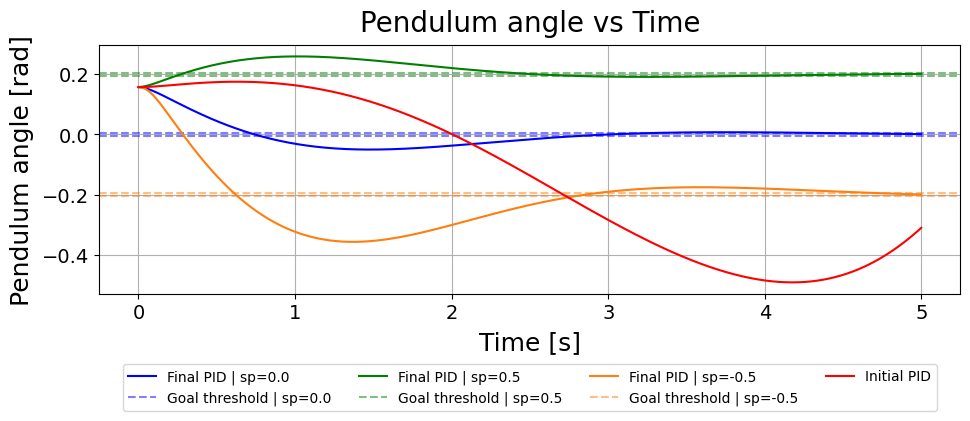

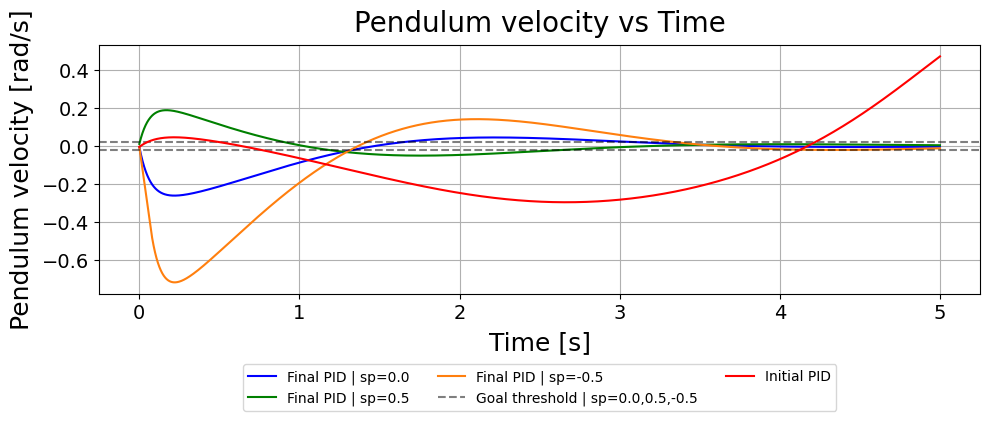

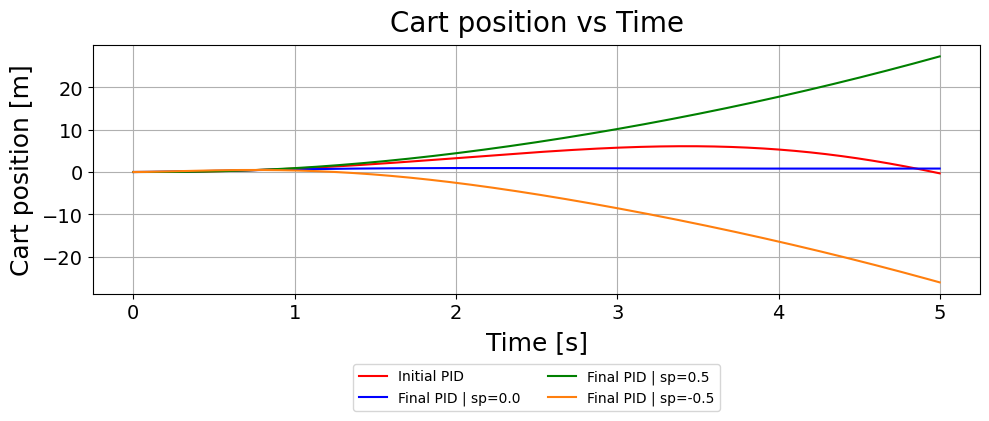

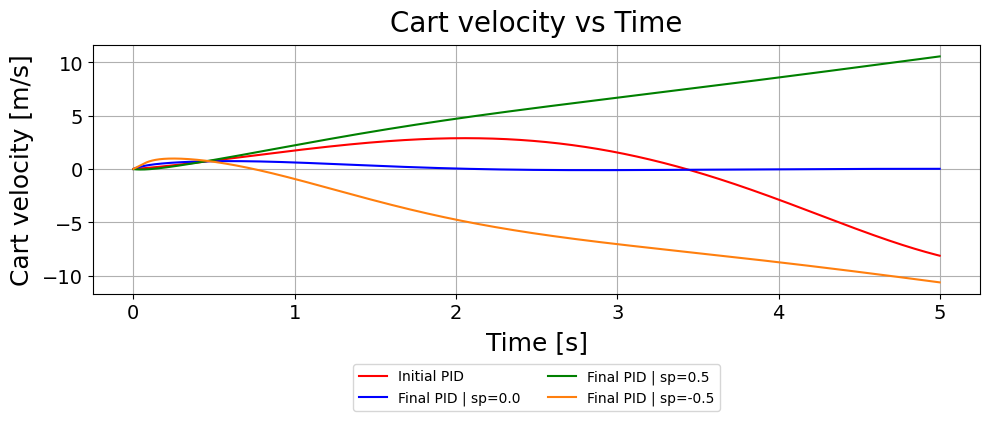

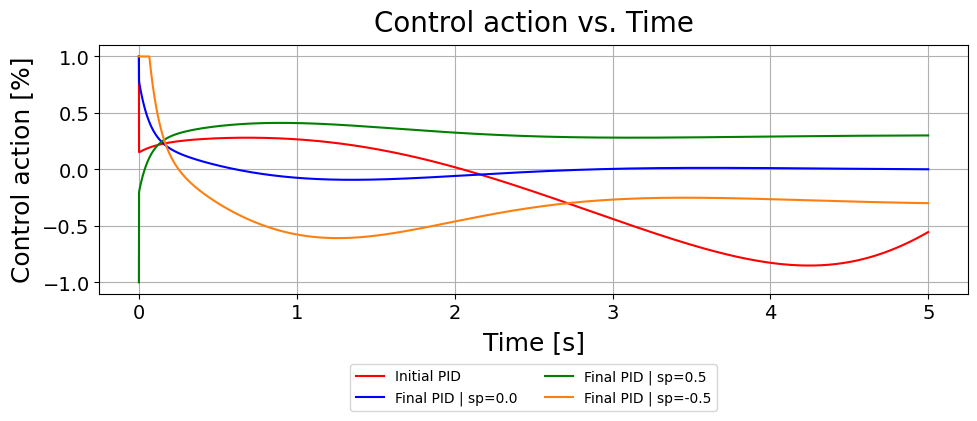

In [279]:
plot_cartPole(hist, hist0, hist1, hist2, 
              pid_cfg['setpoint'], pid_cfg1['setpoint'], pid_cfg2['setpoint'], 
              goal_treshold, fig_save_name='PID tuning - cartPole')

# Simulator WaterTank

In [1]:
import numpy as np
from components.systems.water_tank_system_v1_OneValveControl import WaterTankSystem
from components.controllers.pid_controller import PIDController

import matplotlib.pyplot as plt

In [97]:
def plot_waterTank(hist: dict, 
                   hist0: dict,
                   hist1: dict,
                   hist2: dict,
                   level_sp: float,
                   level_sp1: float,
                   level_sp2: float,
                   goal_treshold: dict, 
                   fig_save_name = None, 
                   figsize = (12, 16)
                  ):
    
    cfg_figsize = figsize
    cfg_title_size = 20
    cfg_axis_label_size = 18
    cfg_axis_tick_size = 14
    cfg_title_pad = 10
    cfg_axis_label_pad = 6
    cfg_legend_size = 'medium'
    
    ##################################################
    time_raw0        = np.array(hist0['time'])
    level_raw0       = np.array(hist0['level'])
    level_rate_raw0  = np.array(hist0['level_rate'])
    control_raw0     = np.array(hist0['control'])

    time0            = time_raw0[~np.isnan(time_raw0)]
    level0           = level_raw0[~np.isnan(level_raw0)]
    level_rate0      = level_rate_raw0[~np.isnan(level_rate_raw0)]
    control0         = control_raw0[~np.isnan(control_raw0)]
    
    t_adjust0 = len(time0)
    ##################################################
    time_raw        = np.array(hist['time'])
    level_raw       = np.array(hist['level'])
    level_rate_raw  = np.array(hist['level_rate'])
    control_raw     = np.array(hist['control'])

    time            = time_raw[~np.isnan(time_raw)]
    level           = level_raw[~np.isnan(level_raw)]
    level_rate      = level_rate_raw[~np.isnan(level_rate_raw)]
    control         = control_raw[~np.isnan(control_raw)]
    
    t_adjust = len(time)
    ##################################################
    time_raw1        = np.array(hist1['time'])
    level_raw1       = np.array(hist1['level'])
    level_rate_raw1  = np.array(hist1['level_rate'])
    control_raw1     = np.array(hist1['control'])

    time1            = time_raw1[~np.isnan(time_raw1)]
    level1           = level_raw1[~np.isnan(level_raw1)]
    level_rate1      = level_rate_raw1[~np.isnan(level_rate_raw1)]
    control1         = control_raw1[~np.isnan(control_raw1)]
    
    t_adjust1 = len(time1)
    ##################################################
    time_raw2        = np.array(hist2['time'])
    level_raw2       = np.array(hist2['level'])
    level_rate_raw2  = np.array(hist2['level_rate'])
    control_raw2     = np.array(hist2['control'])

    time2            = time_raw2[~np.isnan(time_raw2)]
    level2           = level_raw2[~np.isnan(level_raw2)]
    level_rate2      = level_rate_raw2[~np.isnan(level_rate_raw2)]
    control2         = control_raw2[~np.isnan(control_raw2)]
    
    t_adjust2 = len(time2)
    ##################################################
    # Logic Plot
    # Fig 1: Tank Level vs. Time
    fig1, ax1 = plt.subplots(1, 1, figsize=cfg_figsize)
    ax1.plot(time[:t_adjust], level[:t_adjust], label='Final PID | sp=0.75', color='b')
    ax1.axhline(y=level_sp+goal_treshold['level_threshold'], color='b', linestyle='--', label='Goal threshold | sp=0.75', alpha=0.5)
    ax1.axhline(y=level_sp-goal_treshold['level_threshold'], color='b', linestyle='--', alpha=0.5)
    ax1.plot(time1[:t_adjust1], level1[:t_adjust1], label='Final PID | sp=0.825', color='g')
    ax1.axhline(y=level_sp1+goal_treshold['level_threshold'], color='g', linestyle='--', label='Goal threshold | sp=0.825', alpha=0.5)
    ax1.axhline(y=level_sp1-goal_treshold['level_threshold'], color='g', linestyle='--', alpha=0.5)
    ax1.plot(time2[:t_adjust2], level2[:t_adjust2], label='Final PID | sp=0.7', color='tab:orange')
    ax1.axhline(y=level_sp2+goal_treshold['level_threshold'], color='tab:orange', linestyle='--', label='Goal threshold | sp=0.7', alpha=0.5)
    ax1.axhline(y=level_sp2-goal_treshold['level_threshold'], color='tab:orange', linestyle='--', alpha=0.5)
    ax1.plot(time0[:t_adjust0], level0[:t_adjust0], label='Initial PID', color='r', alpha=1.0)
    ax1.set_xlabel('Time [s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    ax1.set_ylabel('Level [m]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    plt.setp(ax1.get_xticklabels(), fontsize=cfg_axis_tick_size)
    plt.setp(ax1.get_yticklabels(), fontsize=cfg_axis_tick_size)
    ax1.set_title('Tank Level vs. Time', fontsize=cfg_title_size, pad=cfg_title_pad)
    ax1.grid(True)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fontsize=cfg_legend_size, numpoints=1, ncol=4)
    plt.tight_layout()
    if fig_save_name is not None:
        fig1.savefig(f"{fig_save_name}_level.png", bbox_inches='tight')
    
    # Fig 2: Level velocity vs. Time
    fig2, ax2 = plt.subplots(1, 1, figsize=cfg_figsize)
    ax2.plot(time[:t_adjust], level_rate[:t_adjust], label='Final PID | sp=0.75', color='b')
    ax2.plot(time1[:t_adjust1], level_rate1[:t_adjust1], label='Final PID | sp=0.825', color='g')
    ax2.plot(time2[:t_adjust2], level_rate2[:t_adjust2], label='Final PID | sp=0.7', color='tab:orange')
    ax2.axhline(y=goal_treshold['level_rate_threshold'], color='k', linestyle='--', label='Goal threshold | sp=0.7,0.75,0.825', alpha=0.5)
    ax2.axhline(y=-goal_treshold['level_rate_threshold'], color='k', linestyle='--', alpha=0.5)
    ax2.plot(time0[:t_adjust0], level_rate0[:t_adjust0], label='Initial PID', color='r', alpha=1.0)
    ax2.set_xlabel('Time [s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    ax2.set_ylabel('Level velocity [m/s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    plt.setp(ax2.get_xticklabels(), fontsize=cfg_axis_tick_size)
    plt.setp(ax2.get_yticklabels(), fontsize=cfg_axis_tick_size)
    ax2.set_title('Level velocity vs. Time', fontsize=cfg_title_size, pad=cfg_title_pad)
    ax2.grid(True)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fontsize=cfg_legend_size, numpoints=1, ncol=3)
    plt.tight_layout()
    if fig_save_name is not None:
        fig2.savefig(f"{fig_save_name}_level_vel.png", bbox_inches='tight')
    
    # Fig 3: Control action vs. Time
    fig3, ax3 = plt.subplots(1, 1, figsize=cfg_figsize)
    ax3.plot(time0[:t_adjust0], control0[:t_adjust0], label='Initial PID', color='r', alpha=1.0)
    ax3.plot(time[:t_adjust], control[:t_adjust], label='Final PID | sp=0.75', color='b')
    ax3.plot(time1[:t_adjust1], control1[:t_adjust1], label='Final PID | sp=0.825', color='g')
    ax3.plot(time2[:t_adjust2], control2[:t_adjust2], label='Final PID | sp=0.7', color='tab:orange')
    ax3.set_xlabel('Time [s]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    ax3.set_ylabel('Control action [%]', fontsize=cfg_axis_label_size, labelpad=cfg_axis_label_pad)
    plt.setp(ax3.get_xticklabels(), fontsize=cfg_axis_tick_size)
    plt.setp(ax3.get_yticklabels(), fontsize=cfg_axis_tick_size)
    ax3.set_title('Control action (openning valve) vs. Time', fontsize=cfg_title_size, pad=cfg_title_pad)
    ax3.grid(True)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fontsize=cfg_legend_size, numpoints=1, ncol=2)
    plt.tight_layout()
    if fig_save_name is not None:
        fig3.savefig(f"{fig_save_name}_control.png", bbox_inches='tight')
    
    plt.show()

In [27]:
def run_simulation(initial_conditions: dict, 
                   system_params: dict,
                   goal_treshold: dict,
                   pid_params: dict,
                   total_time: float,
                   dt: float) -> dict:
    """
    Simula el sistema de tanque de agua controlado por PID.
    Devuelve historiales de time, state, control y flujos.
    """
    # instanciar sistema y controlador
    system = WaterTankSystem(**system_params)
    controller = PIDController(
        kp=pid_params['kp'],
        ki=pid_params['ki'],
        kd=pid_params['kd'],
        setpoint=pid_params['setpoint'],
        dt_sec=pid_params['dt_sec'],
        name_objective_var=pid_params['name_objective_var'],
        actuator_limits=pid_params['actuator_limits'],
        clipping_output=pid_params.get('clipping_output', True),
        normalize_output=pid_params.get('normalize_output', False),
        error_is_setpoint_minus_pv=pid_params.get('error_is_setpoint_minus_pv', True),
        anti_windup=pid_params.get('anti_windup', {})
    )

    # reset estado
    state = system.reset(initial_conditions)    # [level]
    steps = int(total_time / dt)
    # Criterio de estabilización
    level_threshold = goal_treshold['level_threshold']
    level_rate_threshold = goal_treshold['level_rate_threshold']

    history = {
        'time':          np.full(steps, np.nan),
        'level':         np.full(steps, np.nan),
        'level_rate':    np.full(steps, np.nan),
        'control':       np.full(steps, np.nan)
    }

    t = 0.0
    log_var = []
    for i in range(steps):
        # calcular acción PID
        state_dict = {pid_params['name_objective_var']: state[0]}
        u = controller.compute_action(state_dict)

        # integrar dinámica
        next_state = system.apply_action(state, u, t, dt)

        log_var.append(controller.get_params_log())

        # registrar
        history['time'][i]       = t
        history['level'][i]      = next_state[0]
        history['level_rate'][i] = (next_state[0]- state[0]) / dt
        history['control'][i]    = u

        # avanzar
        state = next_state
        t += dt

        #if abs(next_state[0]-pid_params['setpoint']) <= level_threshold and abs(history['level_rate'][i]) <= level_rate_threshold:
        #        break

    return history, log_var

In [87]:
pid_base = {
    'kp': 1.0, 'ki': 1.0, 'kd': 1.0,         # 'kp': 5.0, 'ki': 0.6, 'kd': 0.6,
    'setpoint': 0.75,
    'dt_sec': 0.001,
    'name_objective_var': 'level',
    'actuator_limits': [0.0, 1.0],
    'error_is_setpoint_minus_pv': True,
    'anti_windup': {'enabled': False, 'method': 'back_calculation', 'beta': 0.1}
}
init_cond = {'level': 0.5}
system_cfg = {
    'area_m2': 0.19635,
    'inflow_pump_P_max_pa': 100000,
    'inflow_pump_opening_u': 1.0,
    'inflow_pump_k': 1.5e7,
    'inflow_coeff_Cd': 0.9,
    'inflow_ao_m2': 0.0019625,
    'inflow_opening_u': 0.0,
    'outflow_pump_P_max_pa': 100000.0,
    'outflow_pump_opening_u': 1.0,
    'outflow_pump_k': 1.5e7,
    'outflow_coeff_Cd': 0.9,
    'outflow_ao_m2': 0.0019625,
    'outflow_opening_u': 0.2,
    'fluid_density_kg_m3': 1000,
    'g_accel': 9.81,
    'max_level_m': 1.0
}
goal_treshold = {
    'level_threshold': 0.01,
    'level_rate_threshold': 0.01
}
pid_cfg = {
    'kp': 5.0, 'ki': 0.5, 'kd': 0.2,         # 'kp': 5.0, 'ki': 0.5, 'kd': 0.2,
    'setpoint': 0.75,
    'dt_sec': 0.001,
    'name_objective_var': 'level',
    'actuator_limits': [0.0, 1.0],
    'error_is_setpoint_minus_pv': True,
    'anti_windup': {'enabled': False, 'method': 'back_calculation', 'beta': 0.1}
}
pid_cfg1 = {
    'kp': 5.0, 'ki': 0.5, 'kd': 0.2,         # 'kp': 5.0, 'ki': 0.5, 'kd': 0.2,
    'setpoint': 0.825,
    'dt_sec': 0.001,
    'name_objective_var': 'level',
    'actuator_limits': [0.0, 1.0],
    'error_is_setpoint_minus_pv': True,
    'anti_windup': {'enabled': False, 'method': 'back_calculation', 'beta': 0.1}
}
pid_cfg2 = {
    'kp': 5.0, 'ki': 0.5, 'kd': 0.2,         # 'kp': 5.0, 'ki': 0.5, 'kd': 0.2,
    'setpoint': 0.7,
    'dt_sec': 0.001,
    'name_objective_var': 'level',
    'actuator_limits': [0.0, 1.0],
    'error_is_setpoint_minus_pv': True,
    'anti_windup': {'enabled': False, 'method': 'back_calculation', 'beta': 0.1}
}

In [89]:
hist0, log_var0 = run_simulation(init_cond, system_cfg, goal_treshold, pid_base, total_time=6.0, dt=0.001)
hist, log_var = run_simulation(init_cond, system_cfg, goal_treshold, pid_cfg, total_time=6.0, dt=0.001)
hist1, log_var1 = run_simulation(init_cond, system_cfg, goal_treshold, pid_cfg1, total_time=6.0, dt=0.001)
hist2, log_var2 = run_simulation(init_cond, system_cfg, goal_treshold, pid_cfg2, total_time=6.0, dt=0.001)

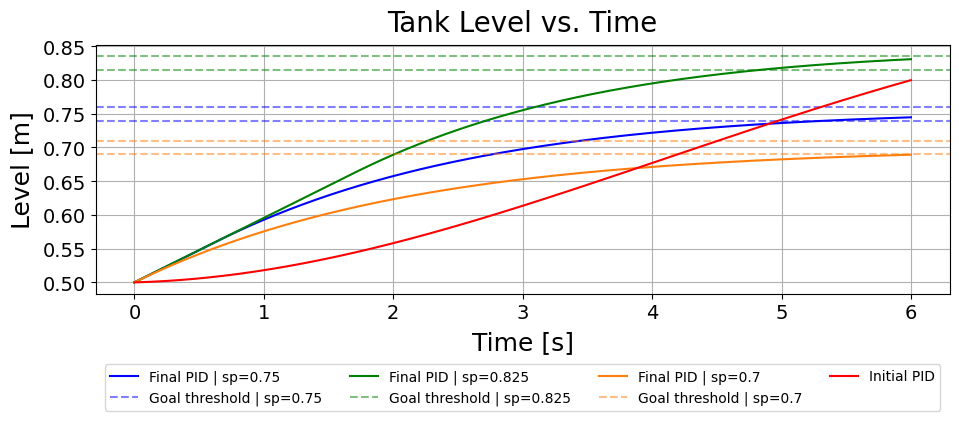

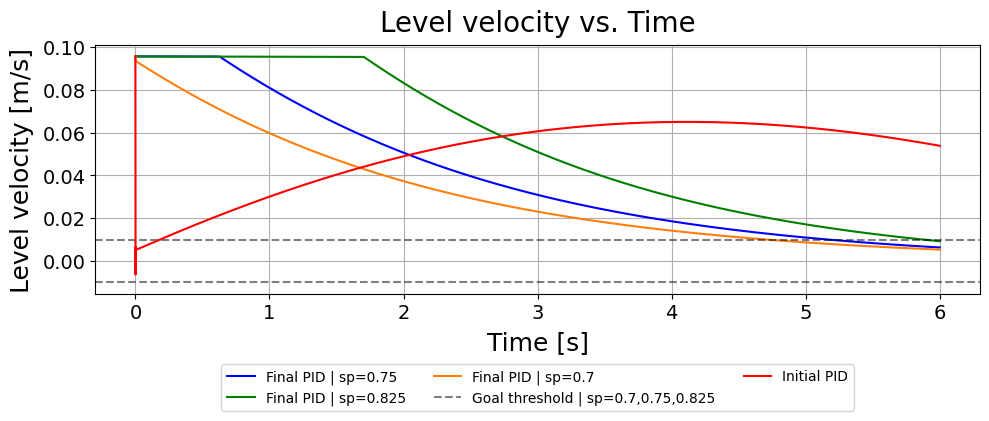

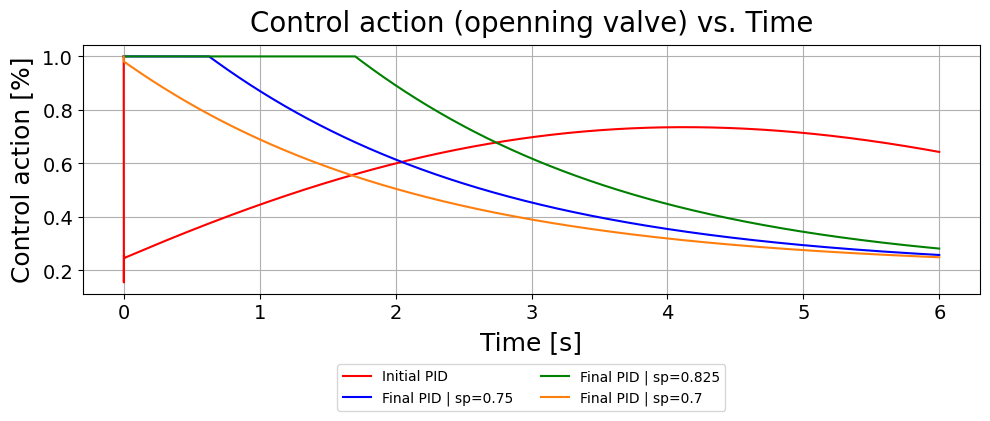

In [99]:
plot_waterTank(hist, hist0, hist1, hist2, 
               pid_cfg['setpoint'], pid_cfg1['setpoint'], pid_cfg2['setpoint'], 
               goal_treshold, fig_save_name='PID tuning - waterTank', figsize=(10,5))

In [25]:
log_var[-10]

{'kp_level': 5.0,
 'ki_level': 0.5,
 'kd_level': 0.2,
 'error_level': 0.0608021594255399,
 'integral_error_level': 0.6562814164147995,
 'p_term_level': 0.3040107971276995,
 'i_term_level': 0.32814070820739977,
 'd_term_level': -0.0013851812332266178,
 'control_action_level': 0.2615326482037452,
 'raw_action_level': 0.6307663241018726,
 'limited_action_level': 0.6307663241018726,
 'normalized_action_level': 0.2615326482037452,
 'effective_action_level': 0.0,
 'saturation_error_level': 0.0}